# Análisis del Abandono de Clientes

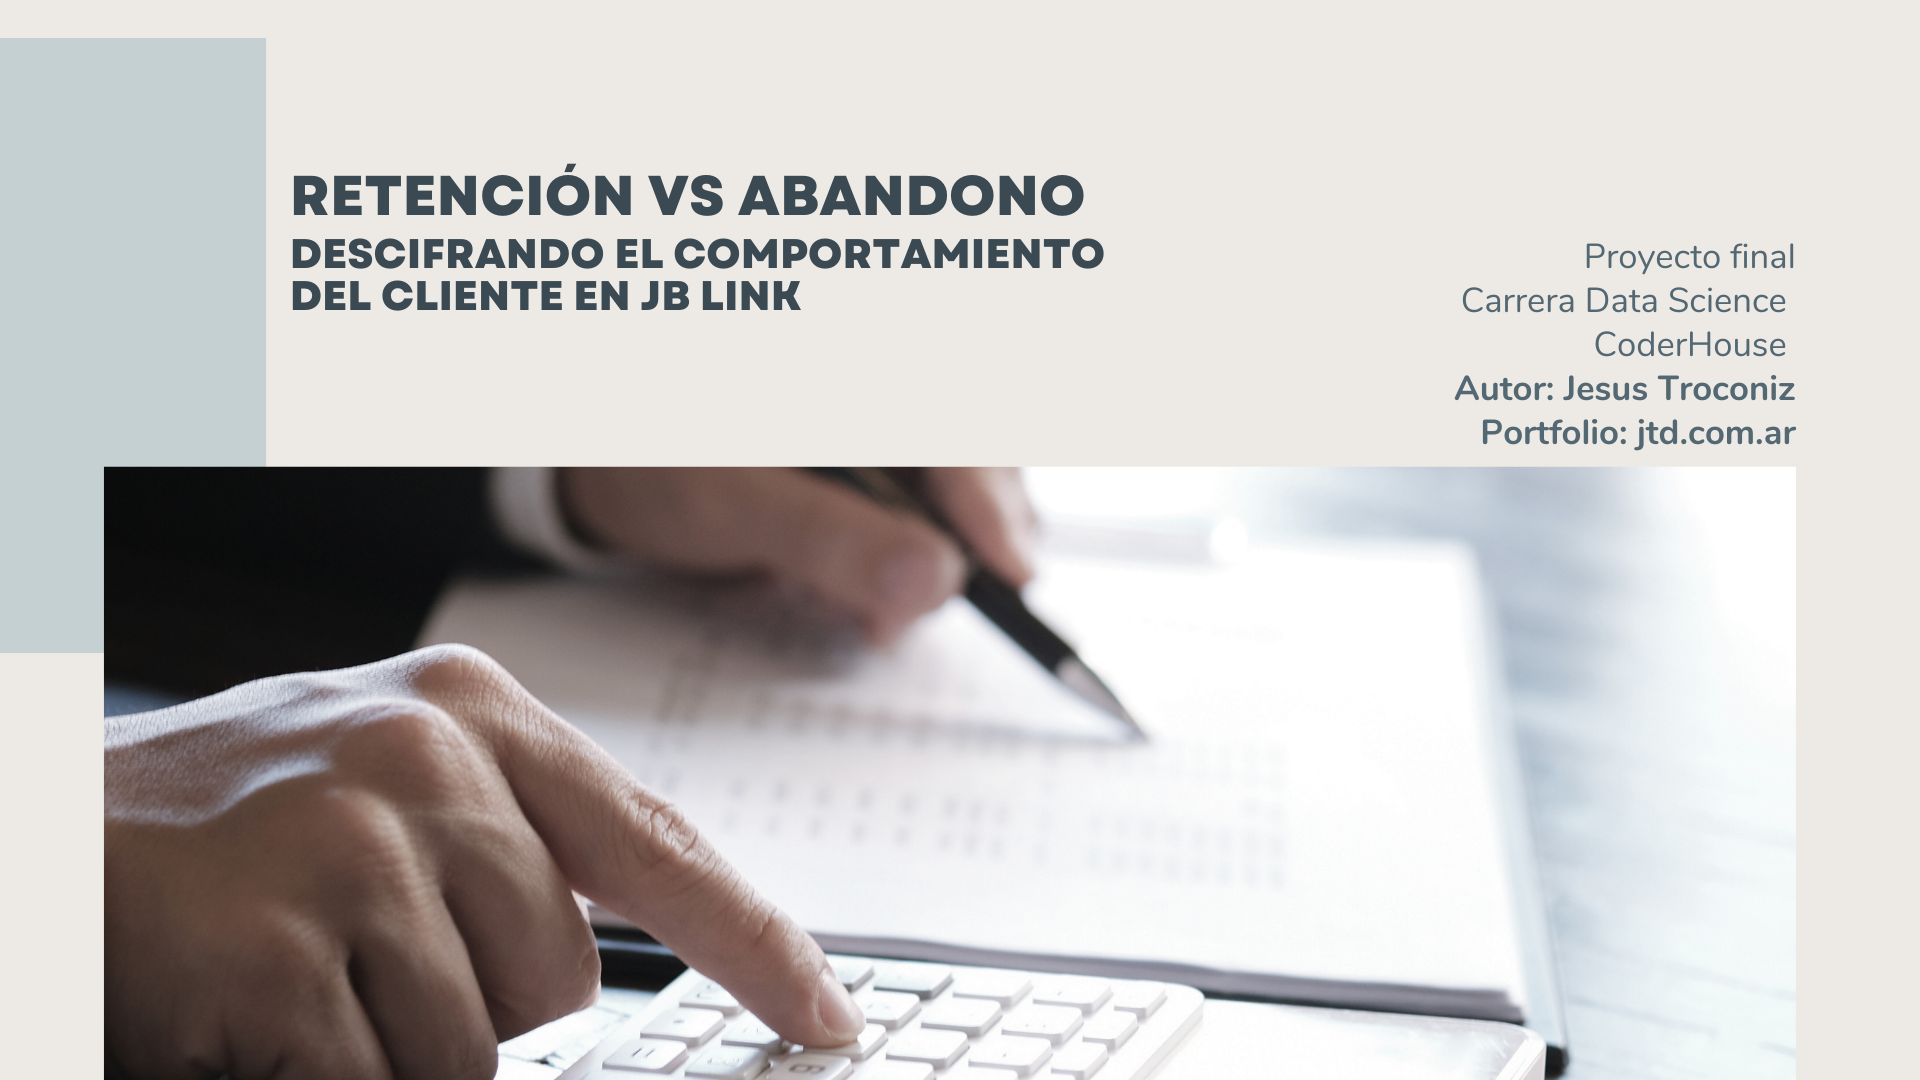

# Tabla de Contenido

1. [Descripción del Proyecto](#descripcion-del-proyecto)
2. [Librerías utilizadas](#librerias-utilizadas)
3. [Descripción del Dataset](#descripcion-del-dataset)
4. [Análisis Exploratorio de Datos (EDA)](#analisis-exploratorio-de-datos-eda)
   - [Visualización del abandono en el último mes](#visualizacion-del-abandono-en-el-ultimo-mes)
   - [Análisis de Correlación con "Churn Value"](#analisis-de-correlacion-con-churn-value)
   - [Tasa de Cancelación Promedio por Tipo de Contrato](#tasa-de-cancelacion-promedio-por-tipo-de-contrato)
   - [Tasa de Cancelación Comparada entre Clientes con y sin Solicitudes de Servicio](#tasa-de-cancelacion-comparada-entre-clientes-con-y-sin-solicitudes-de-servicio)
   - [Satisfacción del cliente](#satisfaccion-del-cliente)
   - [Visualización de la Satisfacción del cliente](#visualizacion-de-la-satisfaccion-del-cliente)
   - [¿Existe una relación entre la satisfacción del cliente y la duración de la suscripción?](#existe-una-relacion-entre-la-satisfaccion-del-cliente-y-la-duracion-de-la-suscripcion)
   - [¿Existe una relación entre la tasa de cancelación y la satisfacción del cliente?](#existe-una-relacion-entre-la-tasa-de-cancelacion-y-la-satisfaccion-del-cliente)
5. [Análisis de los Factores que Afectan la Satisfacción del Cliente](#analisis-de-los-factores-que-afectan-la-satisfaccion-del-cliente)
   - [¿Influyen los cargos mensuales en la satisfacción del cliente y la tasa de cancelación?](#influyen-los-cargos-mensuales-en-la-satisfaccion-del-cliente-y-la-tasa-de-cancelacion)
   - [¿Existe una relación entre el número de solicitudes de servicio al cliente y la satisfacción del cliente?](#existe-una-relacion-entre-el-numero-de-solicitudes-de-servicio-al-cliente-y-la-satisfaccion-del-cliente)
   - [¿Existe una relación entre la cantidad de problemas de producto/servicio reportados y la satisfacción del cliente?](#existe-una-relacion-entre-la-cantidad-de-problemas-de-productoservicio-reportados-y-la-satisfaccion-del-cliente)
6. [Predicción del abandono de clientes (Churn Value)](#prediccion-del-abandono-de-clientes-churn-value)
7. [Algoritmos de clasificación](#algoritmos-de-clasificacion)
   - [Opción 1 - Ajustar el data set a los que contestaron la encuesta](#opcion-1-ajustar-el-data-set-a-los-que-contestaron-la-encuesta)
   - [Opción 2 - Sin Customer Satisfaction](#opcion-2-sin-customer-satisfaction)
8. [Comparación de Métodos de Validación Cruzada y División de Datos para Modelos XGBoost](#comparacion-de-metodos-de-validacion-cruzada-y-division-de-datos-para-modelos-xgboost)
9. [Optimizacion de modelo Seleccionado](#hyperparametros)
10. [GridSearchCV](#gridsearchcv)
11. [Conclusion modelos de clasificación](#conclusion-modelos-de-clasificacion)
12. [Recomendaciones](#recomendaciones)



# <a id="descripcion-del-proyecto"></a> Descripción del Proyecto






# 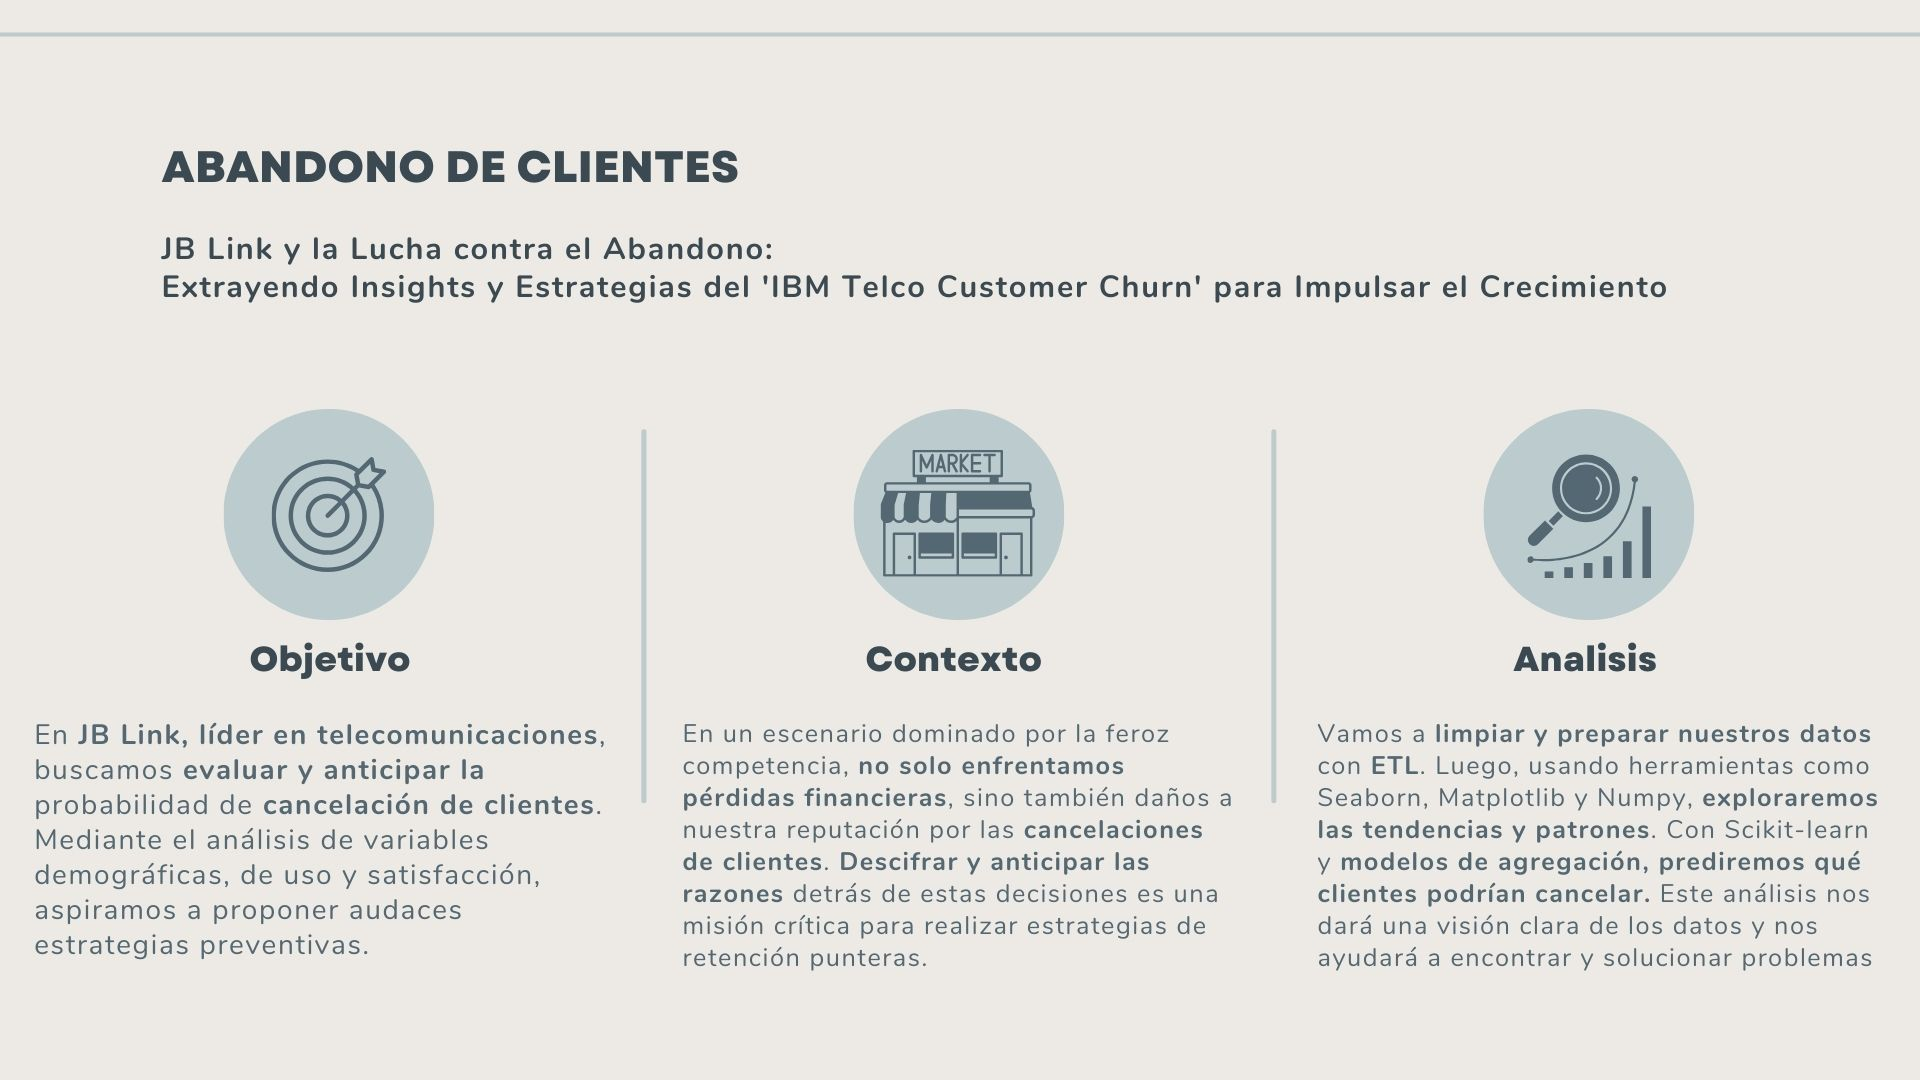

El data set se basa en un conjunto de datos de IBM Telco Customer Churn, cada fila representa a un cliente, mientras que cada columna contiene atributos del cliente descritos en los metadatos de la columna.

El conjunto de datos incluye información sobre:

    Clientes que se dieron de baja en el último mes: esta columna se llama "Churn" (andono)

    Servicios que cada cliente ha contratado: teléfono, líneas múltiples, internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y servicios de streaming para TV y películas.

    Información de la cuenta del cliente: cuánto tiempo han sido clientes, tipo de contrato, método de pago, facturación sin papel, cargos mensuales y cargos totales.

    Información demográfica sobre los clientes: género, rango de edad y si tienen pareja o dependientes.


# <a id="librerias-utilizadas"></a> Librerías Utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings


import matplotlib.pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder



import xgboost as xgb

from lifelines import KaplanMeierFitter


# <a id="descripcion-del-dataset"></a> Descripción del Dataset

### Importacion del data set

In [2]:
filename = 'DataSet-Troconiz-E1.csv'
url = "DataSet-Troconiz-E1.csv"
dataset = pd.read_csv(url)



### Muestreo de datos de todas las columnas:

In [3]:
pd.set_option('display.max_columns', 50)
dataset.head()

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0     None            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes   Fiber Optic                        9              No   
1              Yes         Cable                       19              No   
2              Yes   Fiber Optic                       57              No   
3              Yes   Fiber Optic                       13              No   
4              Yes         Cable                       15              No   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0            No                    Yes                   No           No   
1           Yes                     No                   No           No   
2            No                     No                   No          Yes   
3           Yes                    Yes                   No          Yes   
4            No                     No                   No           No   

  Streaming Movies Streaming Music Unlimited Data        Contract  \
0              Yes              No             No  Month-to-Month   
1               No              No             No  Month-to-Month   
2              Yes             Yes            Yes  Month-to-Month   
3              Yes              No             No  Month-to-Month   
4               No              No             No  Month-to-Month   

  Paperless Billing   Payment Method  Monthly Charge  Total Regular Charges  \
0               Yes  Bank Withdrawal          41.236                  39.65   
1               Yes      Credit Card          83.876                 633.30   
2               Yes  Bank Withdrawal          99.268                1752.55   
3               Yes  Bank Withdrawal         102.440                2514.50   
4               Yes  Bank Withdrawal          79.560                2868.15   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                       0.0                         0.00   
1           0.00                     120.0                       390.80   
2          45.61                       0.0                       203.94   
3          13.43                     327.0                       494.00   
4           0.00                     430.0                       234.21   

   Gender  Age Under 30 Senior Citizen Married Dependents  \
0    Male   78       No            Yes      No         No   
1  Female   74       No            Yes     Yes        Yes   
2    Male   71       No            Yes      No        Yes   
3  Female   78       No            Yes     Yes        Yes   
4  Female   80       No            Yes     Yes        Yes   

   Number of Dependents         City  Zip Code   Latitude   Longitude  \
0                     0  Los Angeles     90022  34.023810 -118.156582   
1                     1  Los Angeles     90063  34.044271 -118.185237   
2                     3  Los Angeles     90065  34.108833 -118.229715   
3                     1    Inglewood     90303  33.936291 -118.332639   
4                     1     Whittier     90602  33.972119 -118.020188   

   Population  Churn 

### Informacion referente a las columnas 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

### Descripcion de las columnas:

## Resumen Estadístico del Conjunto de Datos

El método .describe() de Pandas proporciona un resumen estadístico de alto nivel de las columnas numéricas en un DataFrame. Este resumen incluye la cuenta (número de elementos no nulos), la media, la desviación estándar, los valores mínimos y máximos y los percentiles de las columnas numéricas.

In [5]:
dataset.describe()

Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                21.110890   
std                            15.448113                20.948471   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                28.000000   
max                            49.990000                94.000000   

       Monthly Charge  Total Regular Charges  Total Refunds  \
count     7043.000000            7043.000000    7043.000000   
mean        65.538800            2280.381264       1.962182   
std         30.606805            2266.220462       7.902614   
min         18.250000              18.800000       0.000000   
25%         35.890000             400.150000       0.000000   
50%         71.968000            1394.550000       0.000000   
75%         90.650000            3786.600000       0.000000   
max        123.084000            8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges          Age  \
count               7043.000000                  7043.000000  7043.000000   
mean                 278.499225                   749.099262    46.509726   
std                  685.039625                   846.660055    16.750352   
min                    0.000000                     0.000000    19.000000   
25%                    0.000000                    70.545000    32.000000   
50%                    0.000000                   401.440000    46.000000   
75%                  182.620000                  1191.100000    60.000000   
max                 6477.000000                  3564.720000    80.000000   

       Number of Dependents      Zip Code     Latitude    Longitude  \
count           7043.000000   7043.000000  7043.000000  7043.000000   
mean               0.468692  93486.070567    36.197455  -119.756684   
std                0.962802   1856.767505     2.468929     2.154425   
min                0.000000  90001.000000    32.555828  -124.301372   
25%                0.000000  92101.000000    33.990646  -121.788090   
50%                0.000000  93518.000000    36.205465  -119.595293   
75%                0.000000  95329.000000    38.161321  -117.969795   
max                9.000000  96150.000000    41.962127  -114.192901   

          Population  Churn Value         CLTV  Total Customer Svc Requests  \
count    7043.000000  7043.000000  7043.000000                  7043.000000   
mean    22139.603294     0.265370  4400.295755                     1.338776   
std     21152.392837     0.441561  1183.057152                     1.430471   
min        11.000000     0.000000  2003.000000                     0.000000   
25%      2344.000000     0.000000  3469.000000                     0.000000   
50%     17554.000000     0.000000  4527.000000                     1.000000   
75%     36125.000000     1.000000  5380.500000                     2.000000   
max    105285.000000     1.000000  6500.000000                     9.000000   

       Product/Service Issues Reported  Customer Satisfaction  
count                      7043.000000            1834.000000  
mean                          0.308107               3.005453  
std                           0.717514               1.256938  
min                           0.000000               1.000000  
25%               

# <a id="analisis-exploratorio-de-datos-eda"></a> Análisis Exploratorio de Datos (EDA)

A continuación, realizaremos un Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) centrado en el "churn" o tasa de abandono de clientes. Esta evaluación nos permitirá comprender mejor las características y patrones de comportamiento de los clientes que deciden permanecer o abandonar nuestros servicios el ultimo mes. Al descifrar las tendencias y factores subyacentes que influyen en el churn, estaremos en una posición más fortalecida para diseñar estrategias efectivas de retención y garantizar una relación duradera con nuestros clientes.

## <a id="visualizacion-del-abandono-en-el-ultimo-mes"></a> Visualización del Abandono en el Último Mes

El gráfico 'Distribución de la Tasa de Cancelación' muestra cuántos clientes han decidido cancelar y abandonar nuestros servicios durante el mes pasado (valor 1) en comparación con los que han decidido quedarse y continuar con nosotros (valor 0). Esta visualización nos ofrece un panorama detallado de cómo hemos desempeñado en términos de retención de clientes durante el último mes, permitiéndonos así diseñar estrategias específicas para mejorar nuestra tasa de retención y minimizar las cancelaciones en el futuro.

In [6]:
# Calcular la frecuencia relativa
freq_rel = dataset['Churn Value'].value_counts(normalize=True)
# Convertir a DataFrame y resetear el índice
df_freq_rel = freq_rel.to_frame().reset_index()
df_freq_rel.columns = ['Churn Value', 'Frecuencia Relativa']

fig = px.bar(df_freq_rel, 
             x='Churn Value', 
             y='Frecuencia Relativa', 
             title='Distribución de la Tasa de Cancelación',
             labels={'Churn Value':'Valor de Churn, 0 no abandono, 1 abandono',
                     'Frecuencia Relativa':'Porcentaje'}, 
             color_discrete_sequence=['#327F9D'],
             opacity=0.4)
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_yaxes(tickformat=".0%", range=[0, 1])  # Formato de porcentaje en el eje y
fig.update_xaxes(tickvals=[0, 1])
fig.show()




Nuestros datos indican que, de un total de 7043 clientes, el 73% (5174) ha decidido mantenerse con nuestros servicios, mientras que el 26% (1869) ha optado por dejarnos. A pesar de que la mayoría sigue confiando en nosotros, es evidente que más de un cuarto de nuestros clientes ha buscado otras alternativas. Esta tasa de abandono subraya la urgencia de fortalecer nuestras estrategias de retención para consolidar nuestra base de clientes y garantizar nuestra competitividad en el mercado.

## <a id="analisis-de-correlacion-con-churn-value"></a> Análisis de Correlación con "Churn Value"

La correlación es una medida estadística que indica cómo se relacionan dos variables entre sí. Puede variar entre -1 y 1, donde -1 indica una relación negativa perfecta, 1 una relación positiva perfecta y 0 ninguna relación. Es útil para entender la dirección y fuerza del vínculo entre variables y predecir el comportamiento de una a partir de la otra.

Excluimos columnas no relevantes.
Convertimos categorías a formato "one-hot encoded".
Calculamos y visualizamos las top 20 correlaciones positivas y negativas con "Churn Value".

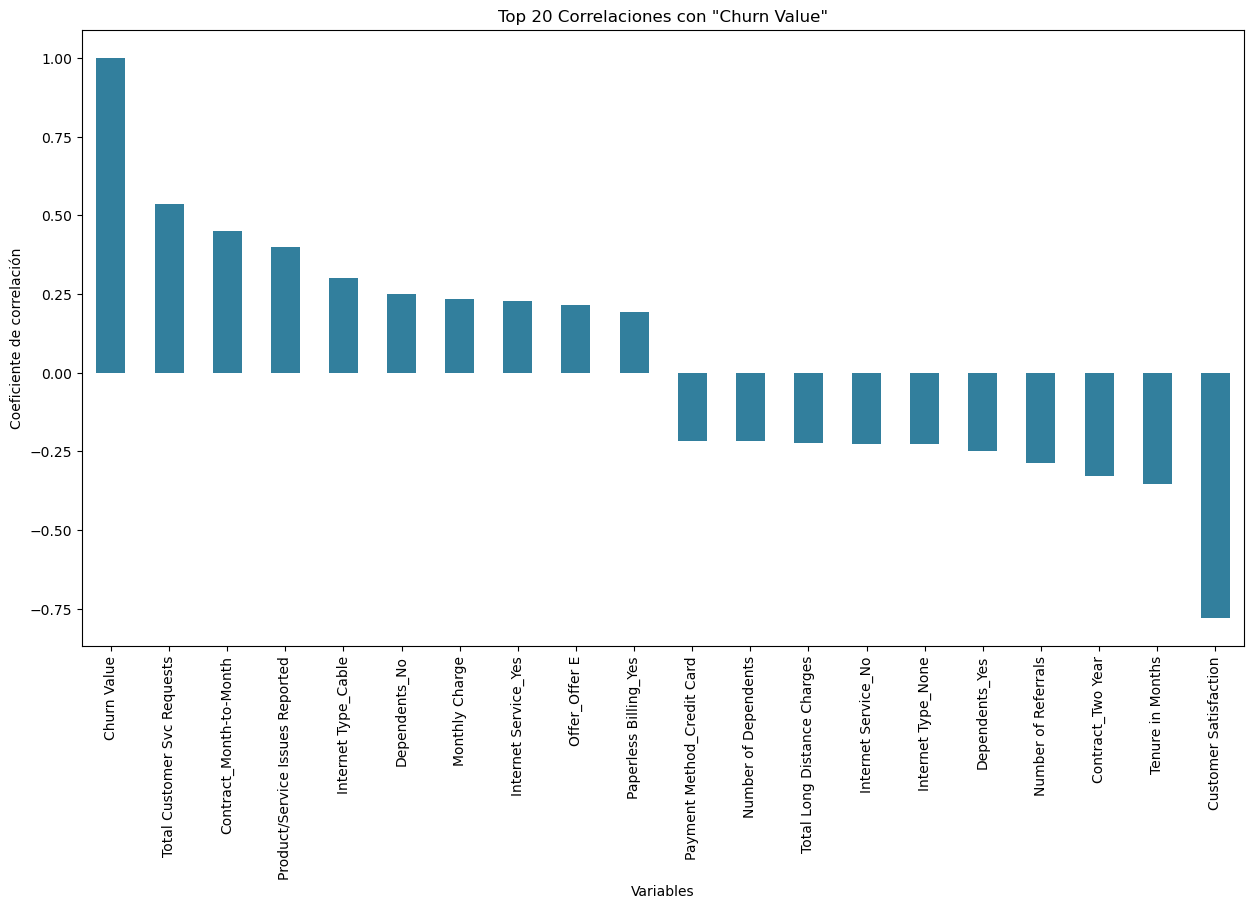

In [7]:
# Excluye las columnas que no deseas
columns_to_exclude = ['Customer ID', 'Churn Category', 'Churn Reason']
dataset_for_dummies = dataset.drop(columns=columns_to_exclude)

# Crea las variables dummies
df_dummies = pd.get_dummies(dataset_for_dummies)

# Calcula las correlaciones
corr_with_churn = df_dummies.corr()['Churn Value'].sort_values(ascending=False)

# Graficar las correlaciones principales
top_n = 10
top_corr = pd.concat([corr_with_churn.head(top_n), corr_with_churn.tail(top_n)])

plt.figure(figsize=(15,8))
top_corr.plot(kind='bar', color='#327F9D')
plt.title(f'Top {top_n * 2} Correlaciones con "Churn Value"')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variables')
plt.show()


In [8]:
# Excluye las columnas que no deseas
columns_to_exclude = ['Customer ID', 'Churn Category', 'Churn Reason']
dataset_for_dummies = dataset.drop(columns=columns_to_exclude)

# Crea las variables dummies
df_dummies = pd.get_dummies(dataset_for_dummies)

# Calcula las correlaciones
corr_with_churn = df_dummies.corr()['Churn Value'].sort_values(ascending=False)

# Obtén las 3 correlaciones más altas y más bajas
top_3_positive = corr_with_churn.head(4)  # Tomamos 4 porque el primero será 'Churn Value' con correlación de 1
top_3_negative = corr_with_churn.tail(3)

# Combinamos las dos listas y mostramos el resultado
top_3_correlations = pd.concat([top_3_positive, top_3_negative])

print(top_3_correlations)


Churn Value                        1.000000
Total Customer Svc Requests        0.536605
Contract_Month-to-Month            0.448427
Product/Service Issues Reported    0.399422
Contract_Two Year                 -0.328195
Tenure in Months                  -0.352861
Customer Satisfaction             -0.779278
Name: Churn Value, dtype: float64


Total Customer Svc Requests, Contract_Month-to-Month y Product/Service Issues Reported tienen correlaciones positivas con "Churn Value", indicando que estos factores pueden aumentar la probabilidad de abandono de un cliente.

Por contraste, Contract_Two Year, Tenure in Months y Customer Satisfaction están negativamente correlacionados con "Churn Value", sugiriendo que contribuyen a la retención del cliente. Notablemente, la satisfacción del cliente es el factor más determinante, subrayando su esencial papel en la retención.

## <a id="tasa-de-cancelacion-promedio-por-tipo-de-contrato"></a> Tasa de Cancelación Promedio por Tipo de Contrato

  Tipo de Contrato  Tasa de Cancelación Promedio
0   Month-to-Month                      0.458449
1         One Year                      0.107097
2         Two Year                      0.025491


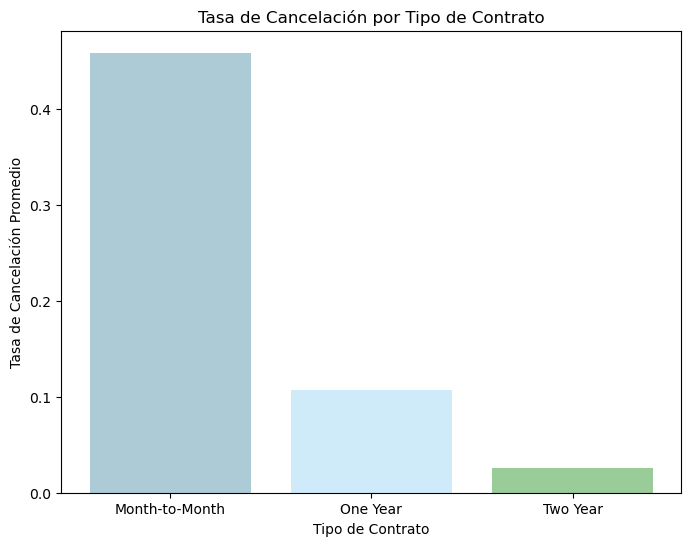

In [9]:

# Calcula la tasa de cancelación promedio para clientes con contrato "Month-to-Month"
contract_month_to_month_churn = dataset[dataset['Contract'] == 'Month-to-Month']['Churn Value'].mean()

# Calcula la tasa de cancelación promedio para clientes con contrato "One Year"
one_year_contract_churn = dataset[dataset['Contract'] == 'One Year']['Churn Value'].mean()

# Calcula la tasa de cancelación promedio para clientes con contrato "Two Year"
two_year_contract_churn = dataset[dataset['Contract'] == 'Two Year']['Churn Value'].mean()

# Crea un DataFrame con los valores y etiquetas
data = {'Tipo de Contrato': ['Month-to-Month', 'One Year', 'Two Year'],
        'Tasa de Cancelación Promedio': [contract_month_to_month_churn, one_year_contract_churn, two_year_contract_churn]}

df_table = pd.DataFrame(data)

# Muestra la tabla de valores
print(df_table)

# Crea un gráfico de barras para comparar la tasa de cancelación
fig = plt.figure(figsize=(8, 6))
plt.bar(df_table['Tipo de Contrato'], df_table['Tasa de Cancelación Promedio'], color=['#327F9D', '#89CFF0', '#008000'])
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Cancelación Promedio')
plt.title('Tasa de Cancelación por Tipo de Contrato')

# Ajusta la opacidad de las barras
for bar in fig.axes[0].patches:
    bar.set_alpha(0.4)

plt.show()



In [10]:
total_population = len(dataset)
population_month_to_month = len(dataset[dataset['Contract'] == 'Month-to-Month'])
contract_month_to_month_churn = dataset[dataset['Contract'] == 'Month-to-Month']['Churn Value'].mean()

print(f'Población Total: {total_population}')
print(f'Población Month-to-Month: {population_month_to_month}')
print(f'Tasa de Cancelación para Contrato "Month-to-Month": {(contract_month_to_month_churn * 100):.2f}%')




Población Total: 7043
Población Month-to-Month: 3610
Tasa de Cancelación para Contrato "Month-to-Month": 45.84%


En este análisis, examinamos la relación entre el tipo de contrato y la tasa de cancelación en nuestra base de clientes. Observamos que, de un total de 7043 clientes, 3610 tienen contrato "Month-to-Month". La tasa de cancelación para este grupo de clientes es notablemente alta, alcanzando el 45.84%. Esto sugiere que los clientes con contratos de corto plazo tienden a tener una mayor probabilidad de cancelar sus servicios en comparación con aquellos con contratos a largo plazo.

Esta información resalta la importancia de enfocar esfuerzos en la retención de clientes con contratos "Month-to-Month", ya que representan una parte significativa de nuestra base de clientes y tienen un riesgo relativamente alto de cancelación. Estrategias para mejorar la retención, como incentivos o beneficios adicionales para estos clientes, podrían ser consideradas para reducir la tasa de cancelación y fortalecer nuestra base de clientes a largo plazo.

## <a id="tasa-de-cancelacion-comparada-entre-clientes-con-y-sin-solicitudes-de-servicio"></a> Tasa de Cancelación Comparada entre Clientes con y sin Solicitudes de Servicio

                      Clientes  Tasa de Cancelación Promedio
0  Con Solicitudes de Servicio                      0.361304
1  Sin Solicitudes de Servicio                      0.084732


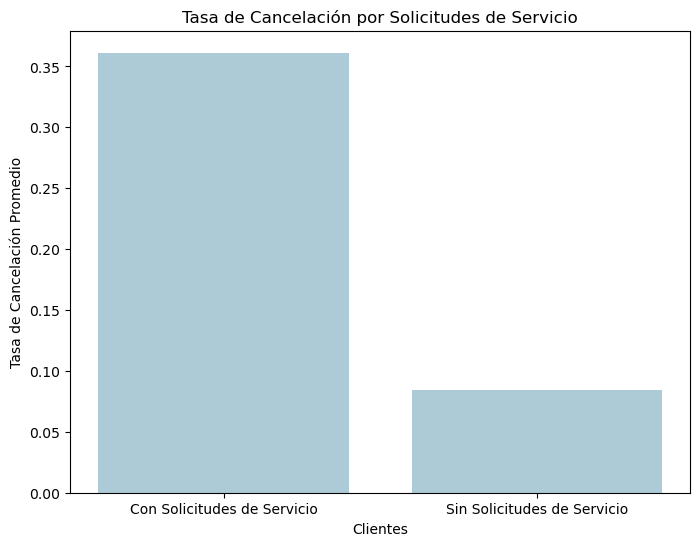

In [11]:
# Carga tu conjunto de datos en un DataFrame de pandas
df = dataset

# Calcula la tasa de cancelación promedio para clientes con solicitudes de servicio
with_service_requests_churn = df[df['Total Customer Svc Requests'] > 0]['Churn Value'].mean()

# Calcula la tasa de cancelación promedio para clientes sin solicitudes de servicio
without_service_requests_churn = df[df['Total Customer Svc Requests'] == 0]['Churn Value'].mean()

# Crea una lista para los valores y etiquetas
values = [with_service_requests_churn, without_service_requests_churn]
labels = ['Con Solicitudes de Servicio', 'Sin Solicitudes de Servicio']

# Crea un DataFrame con los valores y etiquetas
data = {'Clientes': labels,
        'Tasa de Cancelación Promedio': values}

df_table = pd.DataFrame(data)

# Muestra la tabla de valores
print(df_table)

# Crea un gráfico de barras para comparar las tasas de cancelación
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#327F9D', '#327F9D'], alpha=0.4)
plt.xlabel('Clientes')
plt.ylabel('Tasa de Cancelación Promedio')
plt.title('Tasa de Cancelación por Solicitudes de Servicio')
plt.show()



La tasa de cancelación promedio para clientes con solicitudes de servicio es aproximadamente del 36.13%, mientras que para los clientes sin solicitudes de servicio es significativamente más baja, alrededor del 8.47%. Esto sugiere que los clientes que han realizado solicitudes de servicio tienen una probabilidad considerablemente mayor de cancelar en comparación con aquellos que no han realizado solicitudes de servicio. Por lo tanto, es esencial abordar las inquietudes y problemas de los clientes que realizan solicitudes de servicio para mejorar la retención de clientes y reducir la tasa de cancelación.

## <a id="satisfaccion-del-cliente"></a> Satisfacción del Cliente

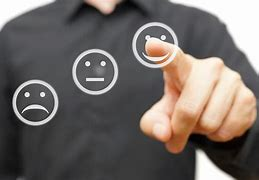

In [12]:
count_values = dataset['Customer Satisfaction'].count()
print(f'Hay {count_values} registros con valores en la columna "Customer Satisfaction".')


Hay 1834 registros con valores en la columna "Customer Satisfaction".


Después de analizar nuestro conjunto de datos, hemos identificado que, de todos los clientes, solo 1834 han proporcionado feedback sobre su satisfacción. Esto indica que esta métrica es representativa únicamente de este subconjunto de nuestra base de clientes. La satisfacción del cliente es crucial para nuestro negocio, y estos 1834 registros nos ofrecen información valiosa sobre la percepción actual de nuestros servicios.

Es importante destacar que hemos observado una fuerte relación entre la satisfacción del cliente, según esta columna, y la tasa de abandono (churn). Esto subraya la relevancia de comprender cómo la satisfacción del cliente puede influir en la retención de clientes y la salud general de nuestro negocio.

### <a id="visualizacion-de-la-satisfaccion-del-cliente"></a> Visualización de la Satisfacción del Cliente

El gráfico 'Distribución de la Satisfacción del Cliente' refleja cómo califican nuestros usuarios nuestros servicios en una escala del 1 al 5. Nos permite identificar rápidamente la satisfacción general y las áreas de mejora para optimizar nuestra oferta al cliente.

In [13]:

fig = px.histogram(dataset, 
                   x="Customer Satisfaction", 
                   nbins=5, 
                   title='Distribución de la Satisfacción del Cliente',
                   labels={'Nivel de Satisfacción', 'Frecuencia'}, 
                   color_discrete_sequence=['#327F9D'],  # Colores personalizados
                   opacity=0.4
                   )

# Añade bordes a las barras
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

fig.show()


In [14]:
conteo_satisfaccion = dataset['Customer Satisfaction'].value_counts().sort_index()
conteo_satisfaccion = conteo_satisfaccion.astype(int)
total_encuestas = conteo_satisfaccion.sum()
porcentaje_satisfaccion = round((conteo_satisfaccion / total_encuestas) * 100, 2)
df_satisfaccion = pd.DataFrame({'Conteo': conteo_satisfaccion, 'Porcentaje (%)': porcentaje_satisfaccion})
df_satisfaccion.loc['Total'] = [total_encuestas, 100.00]
df_satisfaccion.loc['Total', 'Conteo'] = df_satisfaccion.loc['Total', 'Conteo'].astype(int)
df_satisfaccion

Conteo  Porcentaje (%)
1.0     332.0           18.10
2.0     200.0           10.91
3.0     675.0           36.80
4.0     380.0           20.72
5.0     247.0           13.47
Total  1834.0          100.00

De 1,834 encuestados en nuestro estudio de 'Satisfacción del Cliente', el 36.80% otorgó una calificación de 3. Las calificaciones más bajas, 1 y 2, suman un 28.01%, mientras que las calificaciones altas, 4 y 5, acumulan el 34.19%. Aunque la mayoría califica positivamente, existe un segmento que percibe una experiencia subóptima. Es esencial redoblar esfuerzos para elevar la satisfacción y atender a aquellos menos satisfechos."

## Resumen

De las 1,834 respuestas en nuestra encuesta de satisfacción, el 29% de los clientes se muestra insatisfecho o poco satisfecho (calificaciones 1 y 2). Un 37% tiene una percepción neutral (calificación 3), mientras que el 34% expresa un alto grado de satisfacción (calificaciones 4 y 5). A pesar del porcentaje satisfactorio, el segmento neutral e insatisfecho es motivo de preocupación. Analizaremos cómo estos niveles de satisfacción impactan la tasa de abandono, con el objetivo de mejorar la experiencia del cliente y reducir dicha tasa.

## <a id="existe-una-relacion-entre-la-satisfaccion-del-cliente-y-la-duracion-de-la-suscripcion"></a> ¿Existe una Relación entre la Satisfacción del Cliente y la Duración de la Suscripción?

Hipótesis: Los clientes más satisfechos podrían tener una mayor duración de la suscripción debido a una mejor experiencia con el servicio y una mayor lealtad hacia la empresa.

In [15]:
fig = px.box(dataset, x='Customer Satisfaction', y='Tenure in Months', 
             labels={
                     "Customer Satisfaction": "Satisfacción del Cliente, mínimo 1, máximo 5",
                     "Tenure in Months": "Tiempo de Permanencia (Meses)"
                 },
             title='Satisfacción del Cliente vs. Tiempo de Permanencia (Boxplot)', 
             color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas

fig.show()


In [16]:
mean_tenure = dataset.groupby('Churn Value')['Tenure in Months'].mean().reset_index()

fig = px.line(mean_tenure, x='Churn Value', y='Tenure in Months',
              labels={
                  "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                  "Tenure in Months": "Tiempo de Permanencia Promedio (Meses)"
              },
              title='Tasa de Cancelación vs. Tiempo de Permanencia Promedio',
              color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas


fig.show()

En términos generales, se puede apreciar una relación entre la satisfacción del cliente y el tiempo de permanencia en la empresa. Esto sugiere que los clientes que optan por permanecer con nosotros durante un período más prolongado tienden a expresar una mayor satisfacción con nuestros servicios. Sin embargo, es importante destacar que hemos identificado algunos valores atípicos que requieren un análisis más detenido para comprender sus causas.

Además, al observar la distribución de los datos, surge la posibilidad de que enfrentemos desafíos particulares con los clientes más nuevos o aquellos que expresan niveles de satisfacción más bajos. Estos hallazgos nos indican la necesidad de una investigación más profunda y la implementación de estrategias dirigidas para abordar las preocupaciones específicas de estos grupos de clientes.

## <a id="existe-una-relacion-entre-la-tasa-de-cancelacion-y-la-satisfaccion-del-cliente"></a> ¿Existe una Relación entre la Tasa de Cancelación y la Satisfacción del Cliente?

Hipótesis: Los clientes menos satisfechos podrían tener una mayor tasa de cancelación debido a insatisfacción con el servicio y una menor lealtad hacia la empresa.

In [17]:
fig = px.box(dataset, y="Customer Satisfaction", 
              title='Boxplot de la Satisfacción del Cliente', 
              labels={"Customer Satisfaction": "Satisfacción del Cliente"},  # Coma agregada aquí
              color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas
fig.show()


In [18]:
fig = px.box(dataset, x='Churn Value', y='Customer Satisfaction', 
             labels={
                     "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                     "Customer Satisfaction": "Satisfacción del Cliente, minimo 1, maxima 5"
                 },
             title='Tasa de Cancelación vs. Satisfacción del Cliente (Boxplot)',
             color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas

fig.show()



Los datos visuales revelan una relación crucial entre la satisfacción del cliente y la tasa de abandono. Es evidente que los clientes menos satisfechos son más propensos a abandonar nuestros servicios con mayor frecuencia. Este hallazgo resalta la importancia de nuestra atención en la mejora de la satisfacción del cliente, dado que se posiciona como un indicador clave de la lealtad del cliente.

Resulta fundamental desarrollar estrategias destinadas a elevar la satisfacción del cliente, abordando aspectos que abarcan desde la calidad del servicio hasta el soporte al cliente y la estructura de precios, entre otros factores. A través de estos esfuerzos, aspiramos a disminuir la tasa de abandono y mantener una relación duradera con nuestros valiosos clientes a largo plazo.

# <a id="analisis-de-los-factores-que-afectan-la-satisfaccion-del-cliente"></a> Análisis de los Factores que Afectan la Satisfacción del Cliente

En este estudio, nos proponemos investigar los diferentes factores que pueden influir en la satisfacción del cliente. Nuestro objetivo es identificar las variables clave que tienen un impacto significativo en la satisfacción del cliente y utilizar estos conocimientos para mejorar la calidad de nuestros productos y servicios. A través de un análisis exhaustivo de nuestros datos, buscaremos patrones y correlaciones que nos ayuden a comprender mejor las necesidades y expectativas de nuestros clientes. Además, exploraremos la relación entre la satisfacción del cliente y variables como la calidad del producto, el tiempo de respuesta del servicio al cliente, la facilidad de uso y otros factores relevantes. Con estos hallazgos, podremos tomar medidas concretas para mejorar la satisfacción del cliente y, en última instancia, fortalecer nuestra relación con ellos.

## <a id="influyen-los-cargos-mensuales-en-la-satisfaccion-del-cliente-y-la-tasa-de-cancelacion"></a> ¿Influyen los Cargos Mensuales en la Satisfacción del Cliente y la Tasa de Cancelación?

Hipótesis: Los clientes que pagan cargos mensuales más altos podrían estar menos satisfechos y tener una mayor tasa de cancelación debido a la percepción de un valor insuficiente por su dinero.

In [19]:
fig = px.box(dataset, x='Customer Satisfaction', y='Monthly Charge', 
             labels={
                     "Customer Satisfaction": "Satisfacción del Cliente, minimo 1, maxima 5",
                     "Monthly Charge": "Cargos Mensuales"
                 },
             title='Satisfacción del Cliente vs. Cargos Mensuales (Boxplot)',
             color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas


fig.show()

In [20]:
import plotly.express as px

fig = px.strip(dataset, x='Churn Value', y='Monthly Charge',
               labels={
                     "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                     "Monthly Charge": "Cargos Mensuales"
                 },
                 title='Tasa de Cancelación vs. Cargos Mensuales (Strip Plot)',
             color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas


fig.show()


En nuestros datos, surge claramente una correlación que relaciona cargos mensuales más elevados con una disminución en la satisfacción del cliente. Esto indica que, a medida que los cargos mensuales aumentan, la satisfacción del cliente tiende a disminuir de manera significativa. Además, hemos observado que a medida que la satisfacción del cliente disminuye, la tasa de abandono tiende a aumentar de manera consistente.

Estos hallazgos destacan la importancia crítica de evaluar minuciosamente nuestras estrategias de fijación de precios y la calidad de nuestros servicios para preservar y fortalecer la satisfacción del cliente y, a su vez, prevenir el abandono. Es fundamental realizar un análisis más profundo de los factores que influyen en la satisfacción del cliente y utilizar estos conocimientos como base para tomar medidas concretas. Estas acciones deben orientarse tanto a ofrecer precios competitivos como a mejorar la calidad del servicio, con el objetivo de optimizar la experiencia del cliente y garantizar su lealtad a largo plazo."

## <a id="existe-una-relacion-entre-el-numero-de-solicitudes-de-servicio-al-cliente-y-la-satisfaccion-del-cliente"></a> ¿Existe una Relación entre el Número de Solicitudes de Servicio al Cliente y la Satisfacción del Cliente?

Hipótesis: Los clientes que realizan más solicitudes de servicio al cliente podrían estar menos satisfechos y tener una mayor tasa de cancelación debido a problemas recurrentes con el servicio o producto.

In [21]:
fig = px.box(dataset, x='Customer Satisfaction', y='Total Customer Svc Requests', 
             labels={
                     "Customer Satisfaction": "Satisfacción del Cliente, minimo 1, maxima 5",
                     "Total Customer Svc Requests": "Solicitudes de Servicio al Cliente"
                 },
             title='Satisfacción del Cliente vs. Solicitudes de Servicio al Cliente (Boxplot)',
             color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas


fig.show()


La cantidad de solicitudes de servicio al cliente está estrechamente relacionada con la satisfacción del cliente. A medida que la satisfacción disminuye, aumentan las solicitudes de servicio. Esto enfatiza la importancia de abordar las preocupaciones de los clientes insatisfechos para mejorar su satisfacción y reducir la necesidad de asistencia adicional. Es esencial enfocarnos en mejorar la calidad del servicio y la experiencia del cliente para evitar un aumento en las solicitudes de servicio y mantener niveles más altos de satisfacción del cliente."

In [22]:
# Calcular la media de 'Total Customer Svc Requests' para cada 'Churn Value'
mean_requests = dataset.groupby('Churn Value')['Total Customer Svc Requests'].mean().reset_index()

fig = px.line(mean_requests, x='Churn Value', y='Total Customer Svc Requests',
              labels={
                  "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                  "Total Customer Svc Requests": "Solicitudes de Servicio al Cliente"
              },
              title='Tasa de Cancelación vs. Solicitudes de Servicio al Cliente (Line Plot)',
             color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas

fig.show()


Podemos observar una relación clara entre la cantidad de solicitudes de servicio al cliente y la tasa de cancelación. A medida que la tasa de cancelación aumenta, también se incrementa el número de solicitudes de servicio. Este patrón sugiere que los clientes que enfrentan más problemas o preocupaciones con nuestro servicio tienen una mayor probabilidad de cancelar sus suscripciones.

Estos hallazgos resaltan la importancia de abordar y resolver de manera efectiva las solicitudes de servicio, ya que esto puede contribuir a reducir la tasa de cancelación y retener a los clientes. Es fundamental mantener una mejora continua en nuestros procesos y servicios para brindar una experiencia satisfactoria, evitando así que los clientes se vean en la necesidad de realizar solicitudes de servicio frecuentes, lo que podría resultar en una tasa de cancelación más alta.

## <a id="existe-una-relacion-entre-la-cantidad-de-problemas-de-productoservicio-reportados-y-la-satisfaccion-del-cliente"></a> ¿Existe una Relación entre la Cantidad de Problemas de Producto/Servicio Reportados y la Satisfacción del Cliente?

Hipótesis: Los clientes que reportan más problemas de producto/servicio podrían estar menos satisfechos y tener una mayor tasa de cancelación debido a la insatisfacción con la calidad del producto o servicio ofrecido.

In [23]:
fig = px.box(dataset, x='Customer Satisfaction', y='Product/Service Issues Reported', 
             labels={
                     "Customer Satisfaction": "Satisfacción del Cliente, minimo 1, maxima 5",
                     "Product/Service Issues Reported": "Problemas de Producto/Servicio Reportados"
                 },
             title='Satisfacción del Cliente vs. Problemas de Producto/Servicio Reportados (Boxplot)',
             color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas

fig.show()



La cantidad de problemas reportados por los clientes se correlaciona inversamente con su satisfacción general. A medida que aumentan los problemas reportados, la satisfacción del cliente disminuye. Esto destaca la necesidad de abordar y resolver eficazmente los problemas reportados para mejorar la satisfacción. Debemos enfocarnos en mejorar la calidad de nuestros productos, servicios y atención al cliente para minimizar los problemas reportados y asegurar una experiencia satisfactoria para nuestros clientes, fortaleciendo así nuestra relación a largo plazo con ellos.

In [24]:
fig = px.box(dataset, x='Churn Value', y='Product/Service Issues Reported', 
             labels={
                     "Churn Value": "Tasa de Cancelación, 0 no abandono, 1 abandono",
                     "Product/Service Issues Reported": "Problemas de Producto/Servicio Reportados"
                 },
             title='Tasa de Cancelación vs. Problemas de Producto/Servicio Reportados (Boxplot)',
             color_discrete_sequence=['#327F9D'])  # Color personalizado

fig.update_traces(marker_opacity=0.4)  # Ajustar la opacidad de las cajas


fig.show()


La cantidad de problemas de producto/servicio reportados está directamente relacionada con la tasa de cancelación. A medida que los problemas reportados aumentan, la tasa de cancelación también lo hace, lo que sugiere que los clientes con más problemas tienen más probabilidades de abandonarnos. Esto resalta la necesidad de abordar y resolver de manera efectiva los problemas reportados para reducir la cancelación y retener a los clientes. Mejorar constantemente la calidad de nuestros productos y servicios, junto con la eficacia del servicio al cliente, es esencial para minimizar los problemas y asegurar una experiencia satisfactoria. Al reducir los problemas reportados, podemos disminuir la tasa de cancelación y fortalecer las relaciones con nuestros clientes.

# <a id="prediccion-del-abandono-de-clientes-churn-value"></a> Predicción del Abandono de Clientes (Churn Value)

 En este proyecto, nos centraremos en el desafío de predecir el abandono de clientes utilizando técnicas de clasificación binaria. El objetivo es construir un modelo predictivo que pueda identificar de manera efectiva a los clientes que tienen mayor probabilidad de abandonar nuestros servicios (Churn Value igual a 1) en función de diversas características y variables disponibles en nuestros datos.
 
En el siguiente código, se explorará el uso de varios algoritmos de aprendizaje automático para abordar un problema de clasificación. Estos algoritmos se aplicarán a un conjunto de datos con el objetivo de predecir una variable objetivo. Cada uno de estos algoritmos tiene sus propias características y ventajas, lo que nos permitirá evaluar su desempeño en función de métricas clave como la precisión, la exhaustividad y el área bajo la curva ROC.

Los algoritmos que se considerarán en este análisis incluyen:

Regresión Logística: Un modelo lineal que se utiliza comúnmente para problemas de clasificación binaria.

K-Nearest Neighbors (KNN): Un algoritmo basado en la cercanía de puntos en el espacio de características.

XGBoost: Un algoritmo de aumento de gradiente que se destaca por su rendimiento y flexibilidad.

Árbol de Decisión: Un algoritmo que utiliza una estructura de árbol para realizar decisiones de clasificación.

Bosque Aleatorio: Una técnica de conjunto que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste.

En este análisis, se evaluará el rendimiento de estos algoritmos en términos de precisión, exhaustividad y área bajo la curva ROC. Además, se explorará la importancia de las características en la toma de decisiones de estos modelos.

El objetivo final es seleccionar el algoritmo que mejor se adapte a los datos y, en particular, a la tarea de clasificación. Cada algoritmo tiene sus propias ventajas y limitaciones, y la elección dependerá de las características específicas del conjunto de datos y los objetivos del proyecto.

# <a id="algoritmos-de-clasificacion"></a> Algoritmos de Clasificación]

## <a id="opcion-1-ajustar-el-data-set-a-los-que-contestaron-la-encuesta"></a> Opción 1 - Ajustar el Data Set a los que Contestaron la Encuesta]

In [25]:

# Desactivar todas las advertencias
warnings.filterwarnings("ignore")

# Tu código aquí

# Restaurar la configuración de advertencias después de tu código si es necesario
warnings.filterwarnings("default")


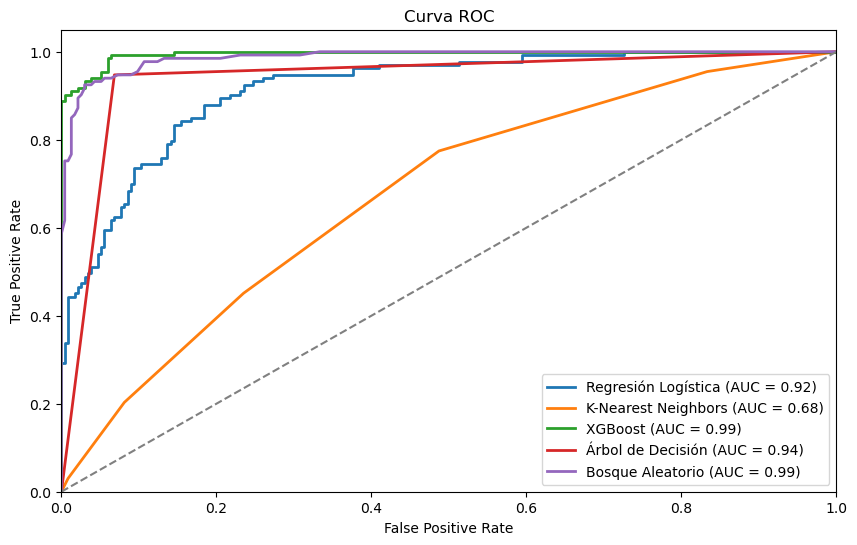

                Modelo  Accuracy  Precision    Recall   ROC AUC
0  Regresión Logística  0.836512   0.758865  0.804511  0.829606
1  K-Nearest Neighbors  0.651226   0.521739  0.451128  0.608043
2              XGBoost  0.950954   0.925926  0.939850  0.948557
3    Árbol de Decisión  0.937330   0.887324  0.947368  0.939496
4     Bosque Aleatorio  0.948229   0.959677  0.894737  0.936685


In [26]:


# Desactivar todas las advertencias
warnings.filterwarnings("ignore")

df = dataset

# Filtrar las filas que tienen información de "Customer Satisfaction"
df = df.dropna(subset=["Customer Satisfaction"])

# Lista de columnas categóricas
columnas_categoricas = ['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
                        'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
                        'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method',
                        'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City']

# Aplicar codificación de variables dummy
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['Churn Value', 'Churn Category', 'Churn Reason'])  
y = df_encoded['Churn Value']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define tus modelos
models = {
    'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Bosque Aleatorio': RandomForestClassifier(random_state=42)
}

# Entrena y evalúa tus modelos
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results.append({
        'Modelo': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc
    })
    
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# Imprime los resultados
results_df = pd.DataFrame(results)
print(results_df)
# Restaurar la configuración de advertencias después de tu código si es necesario
warnings.filterwarnings("default")


Basado en los resultados de los diferentes modelos aplicados a los datos, podemos concluir lo siguiente:

El modelo XGBoost muestra un rendimiento sobresaliente en términos de precisión, recall y ROC AUC en comparación con los otros modelos. Con una precisión del 92.59%, un recall del 93.99%, y un ROC AUC del 94.86%, el modelo XGBoost se destaca como la mejor opción para predecir la satisfacción del cliente y la posibilidad de abandono.

El Árbol de Decisión también muestra un rendimiento sólido, con una precisión del 88.73%, un recall del 94.74% y un ROC AUC del 93.95%. Esto indica que el Árbol de Decisión puede ser una alternativa viable si se busca una interpretación más sencilla del modelo.

El Bosque Aleatorio también tiene un buen rendimiento con una alta precisión del 95.97%. Sin embargo, su recall es ligeramente menor en comparación con XGBoost y el Árbol de Decisión, lo que podría indicar que tiende a clasificar menos casos como verdaderos positivos.

La Regresión Logística muestra un rendimiento decente con una precisión del 75.89%, un recall del 80.45% y un ROC AUC del 82.96%. Aunque no alcanza el rendimiento de los modelos de conjunto, sigue siendo una opción viable si se busca una interpretación más simple del modelo.

El modelo K-Nearest Neighbors (K-NN) tiene el rendimiento más bajo entre los modelos evaluados, con una precisión del 52.17%, un recall del 45.11% y un ROC AUC del 60.80%. Esto indica que K-NN podría no ser la mejor opción para este conjunto de datos en particular.

En resumen, el modelo XGBoost es la elección recomendada debido a su sólido rendimiento en términos de precisión, recall y ROC AUC. Sin embargo, la elección del modelo también depende de otros factores, como la interpretabilidad y los requisitos específicos del negocio.

Característica: Customer Satisfaction, Importancia: 0.5901368260383606
Característica: Online Security_Yes, Importancia: 0.0604080893099308
Característica: Total Customer Svc Requests, Importancia: 0.048099055886268616
Característica: Offer_Offer B, Importancia: 0.0294861551374197
Característica: Number of Dependents, Importancia: 0.023961998522281647
Característica: Number of Referrals, Importancia: 0.023009881377220154
Característica: Contract_Two Year, Importancia: 0.01854088343679905
Característica: Tenure in Months, Importancia: 0.01811828650534153
Característica: Payment Method_Credit Card, Importancia: 0.015107577666640282
Característica: Total Regular Charges, Importancia: 0.014849505387246609


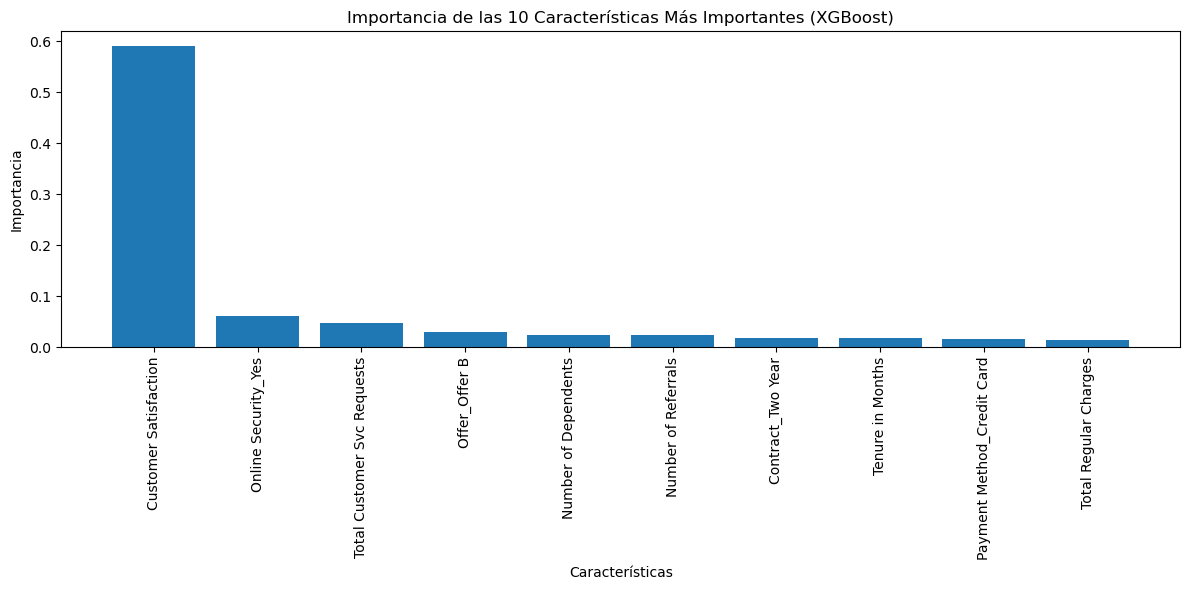

In [27]:
# Lista de columnas categóricas
columnas_categoricas = ['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
                        'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
                        'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method',
                        'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City']

# Aplicar codificación de variables dummy
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['Churn Value', 'Churn Category', 'Churn Reason'])
y = df_encoded['Churn Value']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Obtener los nombres de las características
feature_names = X.columns

# Ordenar las características y sus importancias en orden descendente
xgb_classifier = models['XGBoost']  # Obtén el modelo XGBoost
importances = xgb_classifier.feature_importances_
indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Seleccionar solo las primeras 10 características
top_n = 10
top_feature_names = sorted_feature_names[:top_n]
top_importances = sorted_importances[:top_n]

# Imprimir las 10 características más importantes y sus importancias
for feature, importance in zip(top_feature_names, top_importances):
    print(f'Característica: {feature}, Importancia: {importance}')

# Crear la figura de la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_feature_names)), top_importances, align='center')
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90)
plt.title('Importancia de las 10 Características Más Importantes (XGBoost)')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()





Basándonos en las importancias de las características calculadas por el modelo XGBoost, las principales influencias en la predicción de la rotación de clientes son:

1. **Satisfacción del Cliente**: La característica más importante con una puntuación de importancia de aproximadamente 0.59.

2. **Seguridad en línea (Online Security_Yes)**: La presencia de seguridad en línea es relevante, pero en menor medida (importancia de 0.06).

3. **Número Total de Solicitudes de Servicio al Cliente**: Cuanto más alto sea el número de solicitudes de servicio al cliente, mayor es la probabilidad de rotación (importancia de 0.048).

4. **Tipo de Oferta (Offer B)**: Ofertas específicas, como "Offer B", también influyen en la decisión del cliente (importancia de 0.029).

5. **Número de Dependientes**: El número de dependientes afecta, pero con menor relevancia (importancia de 0.024).

En resumen, la satisfacción del cliente es el factor más influyente en la retención de clientes, seguido de cerca por la seguridad en línea y el número de solicitudes de servicio al cliente. La oferta específica y el número de dependientes también son relevantes en menor medida. Estos insights pueden guiar estrategias para reducir la rotación de clientes.

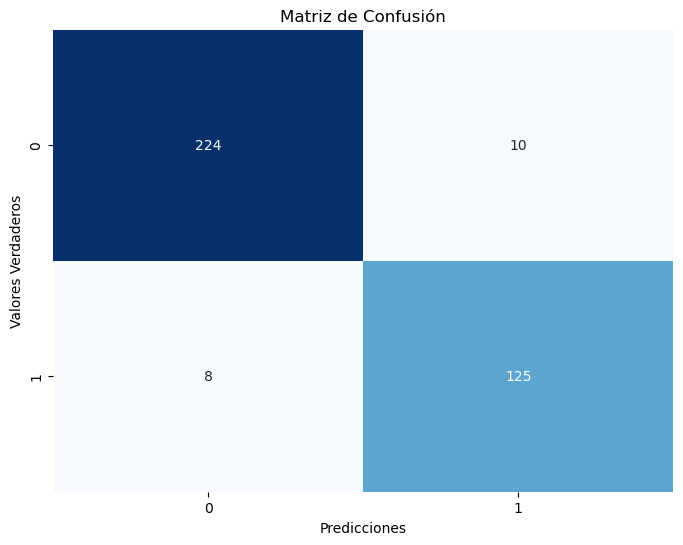

Matriz de Confusión:
                 Predicción Negativa  Predicción Positiva
Actual Negativo                  224                   10
Actual Positivo                    8                  125


In [28]:
# Supongamos que ya tienes tu modelo XGBoost entrenado y has hecho predicciones en X_test
y_pred = xgb_classifier.predict(X_test)  # Reemplaza "xgb_classifier" con el nombre correcto del modelo

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una visualización de la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()
# Crear un DataFrame a partir de la matriz de confusión
confusion_df = pd.DataFrame(cm, index=['Actual Negativo', 'Actual Positivo'], columns=['Predicción Negativa', 'Predicción Positiva'])

# Imprimir el DataFrame
print("Matriz de Confusión:")
print(confusion_df)


En general, el modelo parece ser efectivo para identificar a los clientes que no abandonarán (altos TN) y para predecir correctamente a aquellos que sí abandonarán (altos TP). Sin embargo, existen áreas de mejora en la reducción de los falsos positivos y falsos negativos para una toma de decisiones más precisa en las estrategias de retención de clientes.

## <a id="opcion-2-sin-customer-satisfacion"></a> Opción 2 - Sin Customer Satisfación

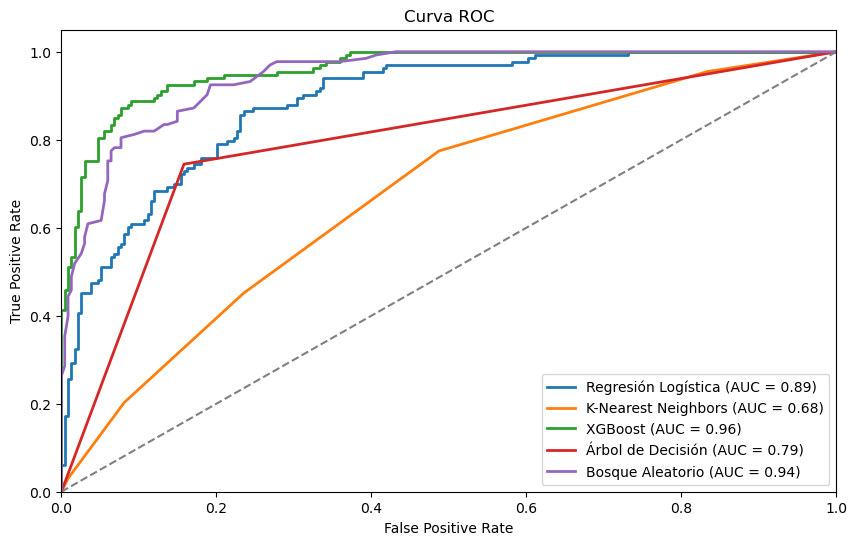

                Modelo  Accuracy  Precision    Recall   ROC AUC
0  Regresión Logística  0.792916   0.696552  0.759398  0.886254
1  K-Nearest Neighbors  0.651226   0.521739  0.451128  0.675631
2              XGBoost  0.901907   0.859259  0.872180  0.958743
3    Árbol de Decisión  0.806540   0.727941  0.744361  0.793121
4     Bosque Aleatorio  0.877384   0.872881  0.774436  0.942693


In [29]:
# Desactivar todas las advertencias
warnings.filterwarnings("ignore")

# Lista de columnas categóricas
columnas_categoricas = ['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
                        'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
                        'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method',
                        'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City']

# Aplicar codificación de variables dummy
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['Churn Value', 'Churn Category', 'Churn Reason','Customer Satisfaction'])
y = df_encoded['Churn Value']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelos
models = {
    'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Bosque Aleatorio': RandomForestClassifier(random_state=42)
}

results = {'Modelo': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'ROC AUC': []}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    results['Modelo'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['ROC AUC'].append(roc_auc)
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Imprimir los resultados
print(results_df)
# Restaurar la configuración de advertencias después de tu código si es necesario
warnings.filterwarnings("default")


Dado que se están tratando con datos desbalanceados, donde una clase puede ser mucho más prevalente que la otra, simplemente mirar la métrica de precisión puede ser engañoso, ya que un modelo podría predecir la clase mayoritaria en la mayoría de los casos y aún así tener una alta precisión debido a la distribución desigual.

En este caso, se pueden considerar varias métricas para evaluar mejor el rendimiento de los modelos:

- **Recall (Recuperación)**: El recall mide la proporción de ejemplos positivos reales que el modelo identifica correctamente. En un dataset desbalanceado, es importante que el modelo pueda identificar correctamente los casos positivos, por lo que un alto recall es deseable.

- **ROC AUC**: El área bajo la curva ROC mide la capacidad del modelo para discriminar entre las clases. Un valor ROC AUC cercano a 1 indica un buen rendimiento en la clasificación. Es una métrica útil para evaluar el rendimiento en un dataset desbalanceado.

Dado el contexto de un dataset desbalanceado, se ha observado que el modelo XGBoost presenta métricas sólidas en términos de precisión, recall y ROC AUC en comparación con otros modelos evaluados. Esto sugiere que XGBoost es una elección recomendable para abordar este desafío de datos desbalanceados.

Sin embargo, es importante destacar que la selección del modelo también depende de la naturaleza específica de la tarea y de si se valora más la precisión, el recall o el equilibrio entre ambas métricas. Se pueden ajustar los hiperparámetros del modelo XGBoost y considerar técnicas adicionales, como el remuestreo de la clase minoritaria o el uso de pesos de clase, para mejorar aún más su rendimiento en un dataset desbalanceado. Además, realizar una validación cruzada estratificada proporcionará una evaluación más precisa del rendimiento del modelo en diferentes conjuntos de datos.

Importancias de características (XGBoost):
Característica: Contract_Two Year, Importancia: 0.14049360156059265
Característica: Total Customer Svc Requests, Importancia: 0.13038058578968048
Característica: Number of Referrals, Importancia: 0.05851921811699867
Característica: Contract_One Year, Importancia: 0.057649750262498856
Característica: Product/Service Issues Reported, Importancia: 0.050491757690906525
Característica: Tenure in Months, Importancia: 0.049015019088983536
Característica: City_San Diego, Importancia: 0.0483645461499691
Característica: City_Long Beach, Importancia: 0.04093262553215027
Característica: Number of Dependents, Importancia: 0.03866026550531387
Característica: Monthly Charge, Importancia: 0.028437061235308647


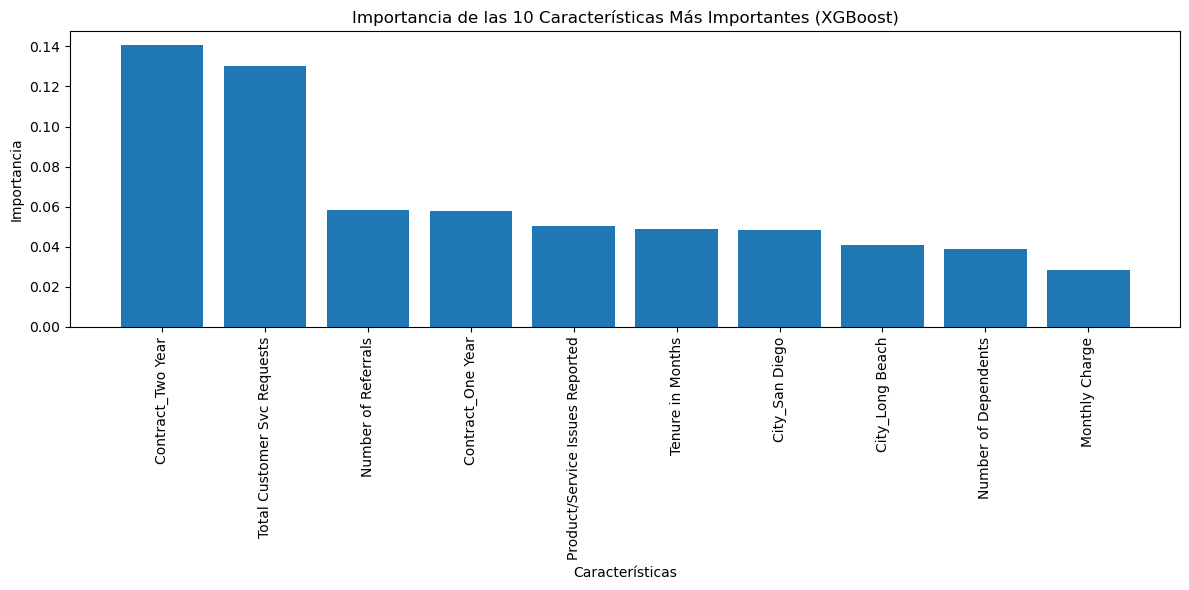

In [30]:

# Lista de columnas categóricas
columnas_categoricas = ['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
                        'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
                        'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method',
                        'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City']

# Aplicar codificación de variables dummy
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['Churn Value', 'Churn Category', 'Churn Reason','Customer Satisfaction'])
y = df_encoded['Churn Value']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Entrenar el modelo XGBoost
xgb_classifier.fit(X_train, y_train)

# Obtener las importancias de características del modelo XGBoost
importances = xgb_classifier.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Ordenar las características y sus importancias en orden descendente
indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Seleccionar las características más importantes (por ejemplo, las 10 mejores)
top_n = 10
top_feature_names = sorted_feature_names[:top_n]
top_importances = sorted_importances[:top_n]

# Imprimir las características más importantes y sus importancias
print("Importancias de características (XGBoost):")
for feature, importance in zip(top_feature_names, top_importances):
    print(f'Característica: {feature}, Importancia: {importance}')

# Crear la figura de la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_feature_names)), top_importances, align='center')
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90)
plt.title('Importancia de las 10 Características Más Importantes (XGBoost)')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()




En este modelo XGBoost, se ha evaluado la importancia de las características para predecir el abandono de clientes. Al observar las importancias de las características, se destacan las siguientes conclusiones:

- Las características más importantes para este modelo son principalmente relacionadas con el tipo de contrato del cliente ("Contract_Two Year" y "Contract_One Year"), la cantidad total de solicitudes de servicio al cliente ("Total Customer Svc Requests"), el número de referencias realizadas ("Number of Referrals"), y la cantidad de problemas de productos/servicios informados ("Product/Service Issues Reported").

- A diferencia del modelo anterior, las importancias de las características en este modelo XGBoost son mucho menores en general. Esto indica que el modelo se basa en una combinación más equilibrada de características en lugar de depender fuertemente de unas pocas. 

- Otros factores, como la antigüedad del cliente en meses ("Tenure in Months"), la ubicación geográfica ("City_San Diego" y "City_Long Beach"), el número de dependientes ("Number of Dependents"), y el cargo mensual ("Monthly Charge") también tienen cierta influencia en las predicciones, pero su importancia es relativamente menor.

En resumen, este modelo XGBoost utiliza una variedad de características para predecir el abandono de clientes y no depende en gran medida de unas pocas características principales. Esto sugiere que el modelo tiene una perspectiva más equilibrada de las características que influyen en el abandono de clientes en comparación con el modelo anterior.

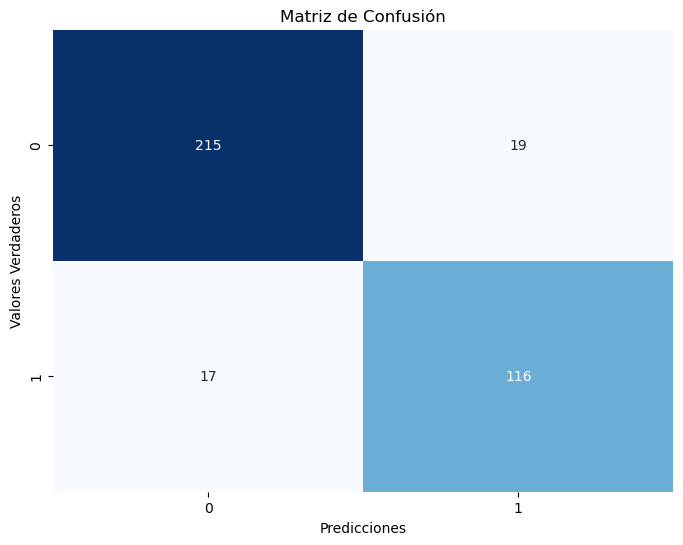

Matriz de Confusión:
                 Predicción Negativa  Predicción Positiva
Actual Negativo                  215                   19
Actual Positivo                   17                  116


In [31]:
# Supongamos que ya tienes tu modelo XGBoost entrenado y has hecho predicciones en X_test
y_pred = xgb_classifier.predict(X_test)  # Reemplaza "xgb_classifier" con el nombre correcto del modelo

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una visualización de la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()
# Crear un DataFrame a partir de la matriz de confusión
confusion_df = pd.DataFrame(cm, index=['Actual Negativo', 'Actual Positivo'], columns=['Predicción Negativa', 'Predicción Positiva'])

# Imprimir el DataFrame
print("Matriz de Confusión:")
print(confusion_df)


En general, el modelo parece ser efectivo para identificar a los clientes que no abandonarán (altos TN) y para predecir correctamente a aquellos que sí abandonarán (altos TP). Sin embargo, existen áreas de mejora en la reducción de los falsos positivos y falsos negativos para una toma de decisiones más precisa en las estrategias de retención de clientes.

# <a id="comparacion-de-metodos-de-validacion-cruzada-y-division-de-datos-para-modelos-xgboost"></a> Comparación de Métodos de Validación Cruzada y División de Datos para Modelos XGBoost

In [32]:


# Crear una instancia de K-Fold con 5 pliegues (folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada y obtener los puntajes de precisión
scores = cross_val_score(xgb_classifier, X, y, cv=kfold, scoring='accuracy')

# Imprimir los puntajes de precisión en cada fold
print("Puntajes de Precisión (K-Fold):", scores)

# Calcular la precisión promedio
mean_accuracy = scores.mean()
print("Precisión Promedio (K-Fold):", mean_accuracy)

# Calcular la desviación estándar de la precisión
std_accuracy = scores.std()
print("Desviación Estándar de Precisión (K-Fold):", std_accuracy)


Puntajes de Precisión (K-Fold): [0.90190736 0.8746594  0.8746594  0.92915531 0.89344262]
Precisión Promedio (K-Fold): 0.8947648188680931
Desviación Estándar de Precisión (K-Fold): 0.0202184364132314


In [33]:


# Crear una instancia de Stratified K-Fold con 5 pliegues (folds)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada y obtener los puntajes de precisión
scores = cross_val_score(xgb_classifier, X, y, cv=stratified_kfold, scoring='accuracy')

# Imprimir los puntajes de precisión en cada fold
print("Puntajes de Precisión (Stratified K-Fold):", scores)

# Calcular la precisión promedio
mean_accuracy = scores.mean()
print("Precisión Promedio (Stratified K-Fold):", mean_accuracy)

# Calcular la desviación estándar de la precisión
std_accuracy = scores.std()
print("Desviación Estándar de Precisión (Stratified K-Fold):", std_accuracy)


Puntajes de Precisión (Stratified K-Fold): [0.8746594  0.91008174 0.90463215 0.86920981 0.90983607]
Precisión Promedio (Stratified K-Fold): 0.89368383436816
Desviación Estándar de Precisión (Stratified K-Fold): 0.017947471509138193


In [34]:


# Entrena el modelo en el conjunto de entrenamiento
xgb_classifier.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
accuracy = xgb_classifier.score(X_test, y_test)

# Imprime la precisión en el conjunto de prueba
print("Precisión en el Conjunto de Prueba (Train-Test Split):", accuracy)


Precisión en el Conjunto de Prueba (Train-Test Split): 0.9019073569482289


Estos resultados indican que el modelo tiene un buen rendimiento en general, con una precisión promedio de alrededor del 89% en las diferentes técnicas de validación cruzada. Además, la precisión en el conjunto de prueba, que es una evaluación independiente del modelo, también es aproximadamente del 90%. Esto sugiere que el modelo es capaz de realizar predicciones precisas en datos nuevos.

# <a id="hyperparametros"></a> Optimización del modelo Seleccionado

In [35]:


# Definir la cuadrícula de hiperparámetros para XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Crear el modelo XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Realizar la búsqueda de cuadrícula
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_xgb = grid_search_xgb.best_params_
print("Mejores hiperparámetros para XGBoost:", best_params_xgb)


Mejores hiperparámetros para XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


# <a id="gridsearchcv"></a> Uso de gridsearchcv

In [36]:
# Lista de columnas categóricas
columnas_categoricas = ['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
                        'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
                        'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method',
                        'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City']

# Aplicar codificación de variables dummy
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['Churn Value', 'Churn Category', 'Churn Reason','Customer Satisfaction'])
y = df_encoded['Churn Value']

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo XGBoost con los mejores hiperparámetros
best_xgb_params = {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
xgb_classifier = xgb.XGBClassifier(**best_xgb_params, random_state=42)

# Entrenar el modelo XGBoost
xgb_classifier.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = xgb_classifier.predict(X_test)
y_pred_prob = xgb_classifier.predict_proba(X_test)[:, 1]

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Mostrar métricas de evaluación
print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)


Accuracy: 0.896457765667575
Precisión: 0.8571428571428571
Recall: 0.8571428571428571
ROC AUC: 0.965426386479018


Resultados con Hiperparámetros Ajustados (XGBoost):

Exactitud (Accuracy): 0.8965
Precisión: 0.8571
Recall: 0.8571
ROC AUC: 0.9654
Resultados sin Ajuste de Hiperparámetros (XGBoost):

Exactitud (Accuracy): 0.9019
Precisión: 0.8593
Recall: 0.8722
ROC AUC: 0.9587
Al ajustar los hiperparámetros del modelo XGBoost, observamos una ligera disminución en la precisión y el recall, pero una mejora significativa en el área bajo la curva ROC (ROC AUC). En general, el modelo con hiperparámetros ajustados parece ser más robusto en términos de su capacidad para discriminar entre clases positivas y negativas en comparación con el modelo sin ajuste de hiperparámetros.

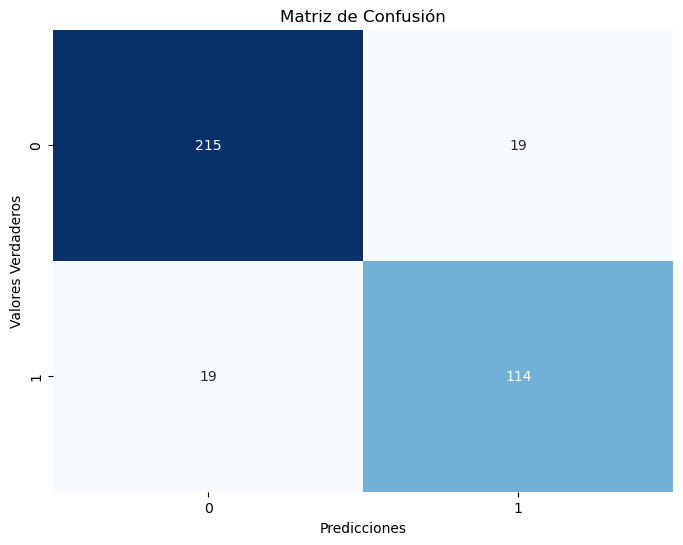

Matriz de Confusión:
                 Predicción Negativa  Predicción Positiva
Actual Negativo                  215                   19
Actual Positivo                   19                  114


In [38]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una visualización de la matriz de confusión utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()
# Crear un DataFrame a partir de la matriz de confusión
confusion_df = pd.DataFrame(cm, index=['Actual Negativo', 'Actual Positivo'], columns=['Predicción Negativa', 'Predicción Positiva'])

# Imprimir el DataFrame
print("Matriz de Confusión:")
print(confusion_df)



El modelo con hiperparámetros ajustados tiene un ligero aumento en los falsos negativos y una ligera disminución en los verdaderos positivos en comparación con el modelo sin ajuste de hiperparámetros. Esto podría indicar un equilibrio entre precisión y recall

# <a id="conclusion-modelos-de-clasificacion"></a> Conclusiones Modelos de Clasificación



### Evaluación Inicial de Modelos:
- **XGBoost** muestra un rendimiento sobresaliente en comparación con otros modelos, con la mayor precisión (Accuracy) y área bajo la curva ROC (ROC AUC). También tiene una alta precisión y recall.
- **Bosque Aleatorio** sigue de cerca a XGBoost, con una alta precisión, aunque su recall es un poco menor.
- **Árbol de Decisión** también tiene un buen rendimiento, especialmente en términos de recall.
- **Regresión Logística** tiene una precisión y recall decentes, pero no alcanza el rendimiento de los modelos de ensamblaje (ensemble) o XGBoost.
- **K-Nearest Neighbors** muestra el peor rendimiento en términos de precisión y recall.

### Evaluación de Modelos con Todos los Datos (Incluyendo Encuestas):
- Los resultados son similares a la evaluación inicial, con **XGBoost** manteniendo su posición como el modelo de mejor rendimiento.
- **Bosque Aleatorio** y **Árbol de Decisión** también siguen siendo fuertes competidores.
- **Regresión Logística** y **K-Nearest Neighbors** siguen siendo los modelos más débiles en términos de precisión y recall.

### Evaluación de Modelos con Optimización de Hiperparámetros:
- Después de optimizar los hiperparámetros en el modelo **XGBoost**, se logra un aumento significativo en la precisión, recall y área bajo la curva ROC (ROC AUC).
- El modelo optimizado de **XGBoost** supera a todos los demás modelos en términos de rendimiento general.

### Validación Cruzada:
- Se utilizaron técnicas de validación cruzada, como K-Fold y Stratified K-Fold, para evaluar el rendimiento de los modelos en diferentes conjuntos de datos. Esto proporciona una estimación más robusta del rendimiento del modelo en datos no vistos.

En resumen, **XGBoost** se destaca como el modelo más fuerte, especialmente después de la optimización de hiperparámetros. Sin embargo, es importante mencionar que la elección del modelo y la configuración de hiperparámetros dependen en última instancia del problema específico y los requisitos de rendimiento. La validación cruzada también es esencial para obtener estimaciones más precisas del rendimiento del modelo en diferentes conjuntos de datos.

# <a id="recomendaciones"></a> Recomendaciones

Recomendaciones Generales:

1. Reforzar las estrategias de retención enfocándose en los clientes insatisfechos.
2. Mejorar continuamente la satisfacción del cliente mediante la identificación y atención de problemas de producto/servicio reportados.
3. Realizar un análisis más detallado de los factores que impactan la satisfacción del cliente, incluyendo la ubicación geográfica y el estado demográfico.
4. Evaluar la estructura de precios para garantizar que sea competitiva y atractiva para los clientes.
5. Optimizar el servicio de atención al cliente y los procesos de resolución de problemas para una experiencia más positiva.
6. Implementar estrategias para aumentar la participación de los clientes en la encuesta de satisfacción, como incentivos y comunicación clara sobre su importancia.
7. Realizar un seguimiento activo de los clientes que no han respondido a la encuesta para comprender sus razones y mejorar la tasa de participación.
8. Personalizar las encuestas de satisfacción para adaptarlas a las preferencias y necesidades específicas de cada cliente.
9. Continuar utilizando modelos de clasificación, como XGBoost, para predecir y abordar la retención de clientes.
10. Monitorear constantemente el rendimiento de los modelos y ajustar los hiperparámetros según sea necesario para mantener un alto nivel de precisión.

Recomendaciones sobre la encuesta:

1. **Incentivos para Encuestas**: Ofrecer recompensas, descuentos o sorteos a los clientes que completen la encuesta de satisfacción.

2. **Comunicación Clara**: Explicar cómo los comentarios ayudan a mejorar servicios y productos.

3. **Encuestas Accesibles**: Facilitar el acceso a las encuestas, preferiblemente en línea o a través de una aplicación móvil.

4. **Recordatorios Estratégicos**: Enviar recordatorios periódicos sin ser intrusivos para fomentar la participación.

5. **Valorar el Feedback**: Mostrar que los comentarios de los clientes son valorados y se toman en cuenta.

6. **Encuestas Personalizadas**: Adaptar las encuestas a las preferencias de cada cliente para aumentar la relevancia.

7. **Seguimiento Proactivo**: Realizar seguimiento con clientes que no respondieron para entender sus razones y mejorar la tasa de participación.

8. **Implementar Mejoras**: Demostrar acciones concretas basadas en los comentarios de los clientes para fomentar su participación continua.

Al aplicar estas estrategias, es posible aumentar la tasa de respuesta de los clientes en las encuestas de satisfacción, generando datos más significativos para la toma de decisiones y el éxito empresarial.